# Market Sector Data Analysis & ML Project
## NIJ6: Anica Bhargava, Alex Eng, Mandy Hsu, Deyvi Ortiz

In this project, we analyze a year's worth of market data by sector, create models for predicting overall stock market performance from sample sets of tickers, and finally build an API for using those models to get predictions.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as pdr

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### 1. Import Sector Data

For each sector, choose a small set of stocks to train our model on.

In [4]:
# tech (Alex), consumer staples (Mandy), energy (Anica), financials (Deyvi)
tech_tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG", "VTSAX"]
startDate = '2019-9-1'
endDate ='2020-9-1'

tech_df = pdr.data.DataReader(tech_tickers, 
                       start = startDate, 
                       end = endDate, 
                       data_source='yahoo')

In [3]:
tech_df = pdr.data.DataReader(tech_tickers, start=startDate, end=endDate, data_source='yahoo')

NameError: name 'tech_df' is not defined

In [7]:
#consumer staples KO(Coca-Cola), PG (Proctor & Gamble), GIS (General Mills), CPB (Campbell & Soup), TSN (Tyson and Foods)
consumer_tickers = ["KO","PG","GIS","CPB","TSN", "VTSAX"]
consumer_df = pdr.data.DataReader(consumer_tickers, start=startDate, end=endDate, data_source='yahoo')
consumer_df.head()

Attributes  Adj Close                                                          \
Symbols            KO          PG        GIS        CPB        TSN      VTSAX   
Date                                                                            
2019-09-03  53.531521  118.336555  52.436710  44.117428  90.697983  70.661659   
2019-09-04  53.986488  120.140472  52.446369  43.767830  83.668869  71.426735   
2019-09-05  53.357277  119.701683  52.301514  43.330830  82.891090  72.378181   
2019-09-06  53.463757  119.808945  53.074062  43.680428  83.649429  72.407608   
2019-09-09  52.776459  119.126381  53.682446  43.301697  81.238335  72.437035   

Attributes      Close                                    ...       Open  \
Symbols            KO          PG        GIS        CPB  ...        GIS   
Date                                                     ...              
2019-09-03  55.299999  121.360001  54.299999  45.430000  ...  53.779999   
2019-09-04  55.770000  123.209999  54.310001  45.070000  ...  54.500000   
2019-09-05  55.119999  122.760002  54.160000  44.619999  ...  54.490002   
2019-09-06  55.230000  122.870003  54.959999  44.980000  ...  54.200001   
2019-09-09  54.520000  122.169998  55.590000  44.590000  ...  55.049999   

Attributes                                       Volume                        \
Symbols           CPB        TSN      VTSAX          KO         PG        GIS   
Date                                                                            
2019-09-03  44.810001  92.599998  72.040001  12991400.0  4959300.0  3414900.0   
2019-09-04  45.700001  91.000000  72.820000  10718100.0  5586900.0  3766900.0   
2019-09-05  45.130001  86.410004  73.790001  13677000.0  7491900.0  2622500.0   
2019-09-06  44.779999  85.230003  73.820000   9093500.0  5306900.0  3391800.0   
2019-09-09  45.070000  86.410004  73.849998  10814900.0  7662400.0  6216000.0   

Attributes                              
Symbols           CPB        TSN VTSAX  
Date                                    
2019-09-03  3118200.0  2495800.0   0.0  
2019-09-04  2396600.0  6912100.0   0.0  
2019-09-05  2129300.0  5304400.0   0.0  
2019-09-06  1851600.0  3076500.0   0.0  
2019-09-09  2620300.0  2917000.0   0.0  

[5 rows x 36 columns]

## 2. Feature Analysis

### For unification purposes, I want the closing prices only

In [12]:
consumer_close = consumer_df['Close']
consumer_close.head()

Symbols            KO          PG        GIS        CPB        TSN      VTSAX
Date                                                                         
2019-09-03  55.299999  121.360001  54.299999  45.430000  93.290001  72.040001
2019-09-04  55.770000  123.209999  54.310001  45.070000  86.059998  72.820000
2019-09-05  55.119999  122.760002  54.160000  44.619999  85.260002  73.790001
2019-09-06  55.230000  122.870003  54.959999  44.980000  86.040001  73.820000
2019-09-09  54.520000  122.169998  55.590000  44.590000  83.559998  73.849998

In [13]:
# Setting up my variables
consumer_X = consumer_close[["KO","PG","GIS","CPB","TSN"]]
consumer_y = consumer_close[['VTSAX']]

In [14]:
consumer_X

Symbols            KO          PG        GIS        CPB        TSN
Date                                                              
2019-09-03  55.299999  121.360001  54.299999  45.430000  93.290001
2019-09-04  55.770000  123.209999  54.310001  45.070000  86.059998
2019-09-05  55.119999  122.760002  54.160000  44.619999  85.260002
2019-09-06  55.230000  122.870003  54.959999  44.980000  86.040001
2019-09-09  54.520000  122.169998  55.590000  44.590000  83.559998
...               ...         ...        ...        ...        ...
2020-08-26  48.160000  138.389999  64.250000  53.480000  63.450001
2020-08-27  48.230000  138.210007  64.709999  53.290001  63.959999
2020-08-28  49.830002  138.770004  63.389999  52.139999  63.910000
2020-08-31  49.529999  138.330002  63.950001  52.610001  62.799999
2020-09-01  49.119999  138.179993  63.119999  51.400002  62.639999

[253 rows x 5 columns]

In [15]:
consumer_y

Symbols         VTSAX
Date                 
2019-09-03  72.040001
2019-09-04  72.820000
2019-09-05  73.790001
2019-09-06  73.820000
2019-09-09  73.849998
...               ...
2020-08-26  85.680000
2020-08-27  85.879997
2020-08-28  86.470001
2020-08-31  86.349998
2020-09-01  87.080002

[253 rows x 1 columns]

## 3. Regression for VTSAX

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
consumer_X_train, consumer_X_test, consumer_y_train, consumer_y_test = train_test_split(consumer_X, consumer_y, test_size=0.2, random_state=0)

display(consumer_X_train)

Symbols            KO          PG        GIS        CPB        TSN
Date                                                              
2020-04-24  45.430000  118.779999  60.480000  50.750000  58.980000
2020-04-21  45.380001  119.680000  59.779999  50.439999  61.910000
2019-12-19  54.320000  124.919998  53.200001  48.220001  89.739998
2019-11-25  53.220001  120.510002  52.720001  46.799999  88.629997
2020-05-14  43.700001  113.809998  62.209999  52.970001  59.160000
...               ...         ...        ...        ...        ...
2019-12-06  54.419998  124.190002  53.310001  47.750000  89.449997
2020-06-08  49.849998  119.050003  62.139999  49.889999  68.669998
2020-02-20  59.720001  126.580002  54.130001  47.740002  78.800003
2019-11-07  52.290001  119.620003  51.980000  46.419998  83.250000
2020-05-08  46.110001  115.949997  59.759998  51.259998  60.389999

[202 rows x 5 columns]

In [27]:
from sklearn.linear_model import LinearRegression
consumer_linear_model = LinearRegression()
consumer_linear_model.fit(consumer_X_train, consumer_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Testing out the consumer model and see how well it estimates VSTAX

In [30]:
from sklearn.metrics import r2_score
r2_score(consumer_y_test, consumer_linear_model.predict(consumer_X_test))

0.7799070484869446

In [31]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233B8515D08>,
      dtype=object)

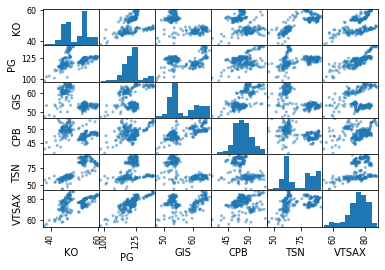

In [32]:
# Plotting all of the consumer information 
scatter_matrix(consumer_close)

## 4. Classification for VTSAX

Can tag each VTSAX record with whether or not it increased from yesterday.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [35]:
consumer_y2 = consumer_y > consumer_y.shift(1)
consumer_y2.head()

Symbols     VTSAX
Date             
2019-09-03  False
2019-09-04   True
2019-09-05   True
2019-09-06   True
2019-09-09   True

In [36]:
consumer_single = consumer_close[['KO']]

# starting to train the new model
consumer_X2_train, consumer_X2_test, consumer_y2_train, consumer_y2_test = train_test_split(consumer_single, consumer_y2, test_size=0.2, random_state=360)

In [37]:
consumer_class_model = LogisticRegression()
consumer_class_model.fit(consumer_X2_train, consumer_y2_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
consumer_y2_pred = consumer_class_model.predict(consumer_X2_test)
print(confusion_matrix(consumer_y2_pred, consumer_y2_test))

[[ 0  0]
 [27 24]]


## 5. Cross-Sector Analysis

## 6. API with Flask